# Data Vizualization in Python

## Importing the data

[pandas](https://pandas.pydata.org/) provides excellent data reading and querying module, [dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), which allows you to import structured data and perform SQL-like queries.

Here we imported some house price records from [Trulia](https://www.trulia.com/?cid=sem%7Cgoogle%7Ctbw_br_nat_x_x_nat!53f9be4f%7CTrulia-Exact_352364665_22475209465_aud-278383240986:kwd-1967776155_260498918114_). For more about extracting data from Trulia, please check [my previous tutorial](https://www.youtube.com/watch?v=qB418v3k2vk).

In [2]:
import pandas
df = pandas.read_excel('house_price.xlsx')
df[:10]

,ID,price,bedroom,bathroom,house_type,lot_size,built_in,area,days,views
0,993,229900,3,2,single-family home,10018,2002,1541,77,1357
1,994,149900,4,2,single-family home,8712,1975,1810,5,1282
2,995,229900,3,2,single-family home,13504,1988,1456,76,947
3,996,359000,5,4,single-family home,10130,1997,2903,79,951
4,999,394000,3,2,single-family home,18295,2001,2616,73,709
5,1000,349900,3,2,single-family home,204732,1967,3850,42,366
6,1002,148500,3,1,single-family home,9147,1959,1000,17,328
7,1003,134900,2,2,townhouse,2300,1994,920,56,328
8,1004,265000,3,3,single-family home,13939,1998,2705,12,362
9,1005,149900,4,3,townhouse,2291,1999,1440,4,137


# A quick look of the data


pandas.DataFrame has powerful statistics and visualizing functions. We can use the pandas.DataFrame.describe to generate quick descriptive statistics of our data.

In [4]:
df.describe()

,ID,price,bedroom,bathroom,lot_size,built_in,area,days,views
count,41.000000,4.100000e+01,41.000000,41.00000,4.100000e+01,41.000000,41.000000,41.000000,41.000000
mean,1030.439024,3.521756e+05,3.463415,2.95122,2.264409e+05,1986.341463,2450.390244,44.243902,434.560976
std,31.760076,2.250231e+05,1.027073,1.39555,9.226742e+05,23.879499,1362.546401,33.946856,405.814185
min,993.000000,1.349000e+05,2.000000,1.00000,2.178000e+03,1924.000000,864.000000,3.000000,17.000000
25%,1006.000000,1.820000e+05,3.000000,2.00000,8.682000e+03,1970.000000,1464.000000,17.000000,110.000000
50%,1020.000000,3.099000e+05,3.000000,3.00000,1.350400e+04,1993.000000,2003.000000,34.000000,310.000000
75%,1047.000000,4.290000e+05,4.000000,4.00000,2.178000e+04,2005.000000,3145.000000,76.000000,709.000000
max,1104.000000,1.100000e+06,6.000000,6.00000,4.356000e+06,2018.000000,5955.000000,103.000000,1357.000000


We can also create histograms to see the distributions of our data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201DCF75C50>,
      dtype=object)

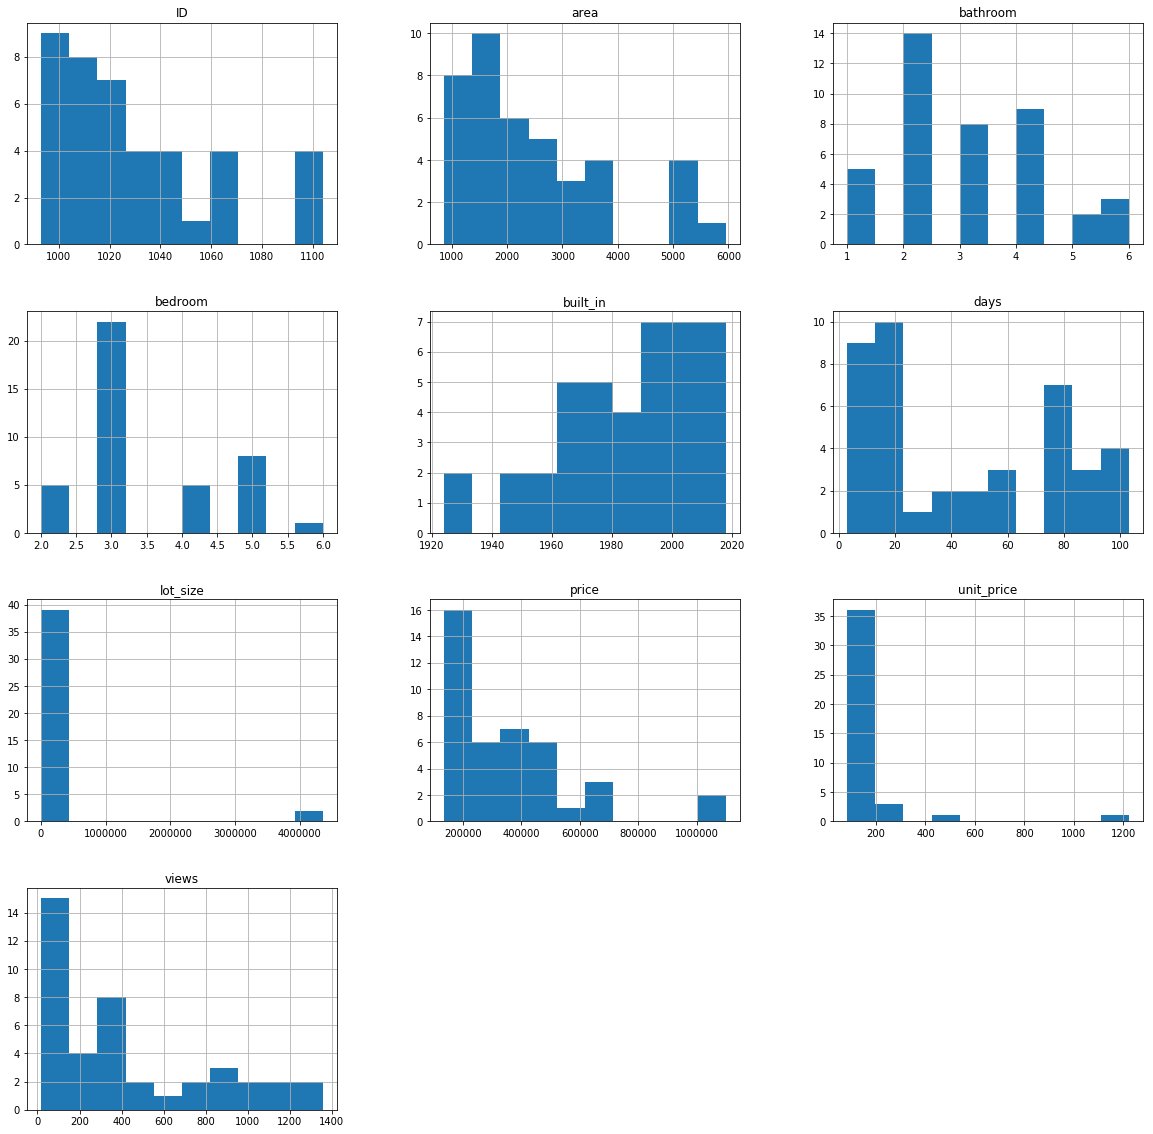

In [22]:
%matplotlib inline
df.hist(figsize=(20,20))

We can also create scatter plots to see the relationships among all columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201DA1CB1D0>,
      dtype=object)

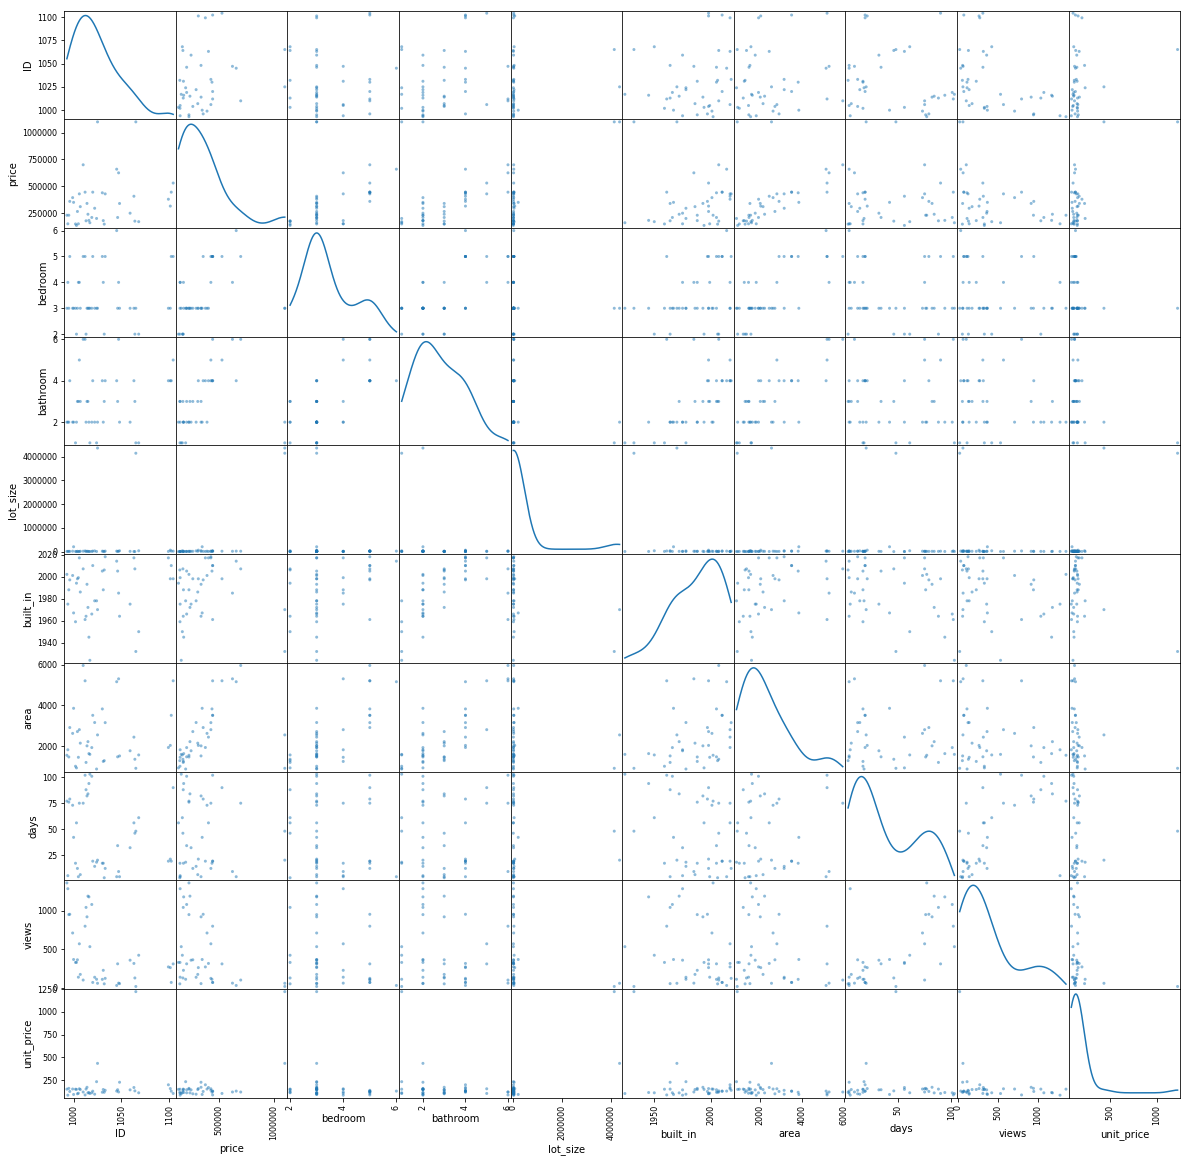

In [20]:
%matplotlib inline

from  pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20, 20), diagonal='kde')

# Exploring the data

We want to see how many different types of houses are in our records:

In [8]:
df.groupby('house_type').count()

,ID,price,bedroom,bathroom,lot_size,built_in,area,days,views
house_type,,,,,,,,,
condo,2,2,2,2,2,2,2,2,2
single-family home,36,36,36,36,36,36,36,36,36
townhouse,3,3,3,3,3,3,3,3,3


Let's compare the average prices and views for each type of houses.

In [9]:
df.groupby('house_type').mean()

,ID,price,bedroom,bathroom,lot_size,built_in,area,days,views
house_type,,,,,,,,,
condo,1024.000000,164450.000000,2.500000,2.500000,4791.500000,1975.500000,1449.000000,48.500000,613.500000
single-family home,1031.833333,378236.111111,3.555556,3.000000,257256.138889,1985.861111,2604.000000,45.083333,439.305556
townhouse,1018.000000,164600.000000,3.000000,2.666667,4424.333333,1999.333333,1274.666667,31.333333,258.333333


We can also visualize the difference by creating histograms for each type of houses.

house_type
condo                 [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
single-family home    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
townhouse             [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

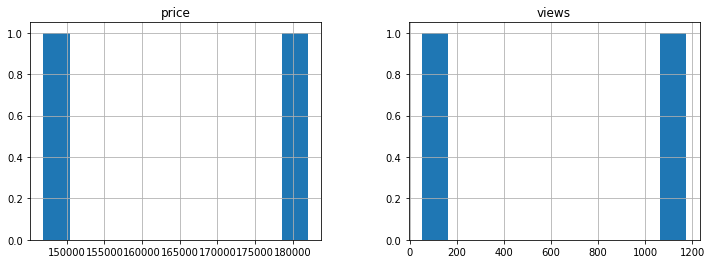

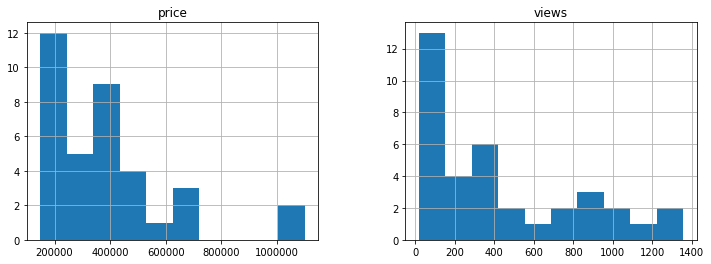

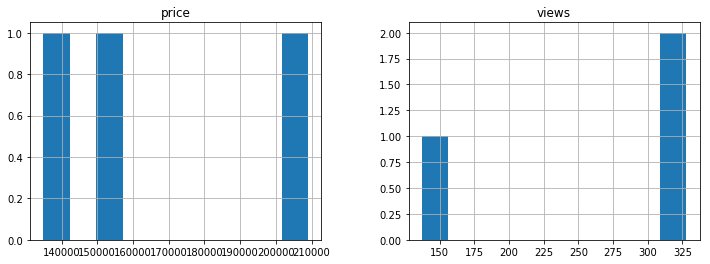

In [10]:
df.groupby('house_type').hist(figsize=(12,4),column=['price','views'])

We want to see how the ages of hosues determine the prices. Here we use a scatterplot.

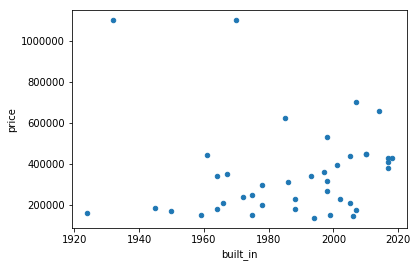

In [11]:
df.plot.scatter(x='built_in',y='price')

Since house prices are largely determined by sizes, ages and other factors, let's see how the house ages determine the house unite price, i.e., price/size. Let's calculate the unit price first, and then add the results to a new column called unit_price

In [13]:
df['unit_price']=df['price']/df['area']

For each year, we calculate the average unite price, and assign the result to a new dataframe

In [14]:
mean_price =df.groupby('built_in').mean()

Line chart is a good choice for visualizing trends. Let's use a line chart to see how the unite prices is determined by the house ages.

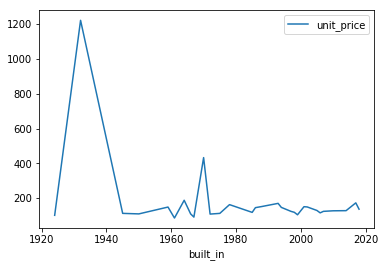

In [21]:
mean_price.plot.line(y='unit_price')